Ahmad Raza

21i-1714

DS-B

Data Mining Lab

Lab 4

In [11]:
# Step 1: Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [12]:
# Step 2: Load the dataset
file_path = "groceries_final.csv"
marketdf = pd.read_csv(file_path, header=None)

In [13]:
# Display dataset info
print("Dataset Shape:", marketdf.shape)
display(marketdf.head())

Dataset Shape: (9835, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Step 3: Define the pruning function
def prune_Dataset(input_df, length_trans=2, total_sales_perc=0.40):
    final_df2 = pd.DataFrame()
    
    for i in range(input_df.shape[0]):
        cnt = 0
        new_input = input_df.iloc[i:i+1]
        
        for j in range(new_input.shape[1]):
            if new_input.iloc[:, j].isnull().values.any():
                if cnt <= length_trans:
                    break
                if cnt == 31:
                    final_df2 = pd.concat([final_df2, new_input], ignore_index=True)
            cnt += 1

    dict2 = {}
    
    for i in range(final_df2.shape[1]):
        for j in range(final_df2.shape[0]):
            value = final_df2.iloc[j, i]
            if pd.isna(value):
                continue
            dict2[value] = dict2.get(value, 0) + 1

    total_purchase = sum(dict2.values())

    market_sort = [
        [item, count, (count * 100 / total_purchase)] 
        for item, count in sorted(dict2.items(), key=lambda x: x[1], reverse=True)
    ]

    new_market_df = pd.DataFrame(market_sort, columns=["item_name", "item_count", "item_perc"])
    new_market_df2 = new_market_df.dropna(subset=["item_name"])

    new_total_purchase = new_market_df2["item_count"].sum()
    new_market_df3 = new_market_df2[["item_name", "item_count"]].copy()
    
    new_market_df3["item_perc"] = new_market_df3["item_count"] / new_total_purchase

    out_df = pd.DataFrame()
    
    for i in range(len(new_market_df3)):
        if new_market_df3["item_perc"].iloc[:i].sum() > total_sales_perc:
            out_df = new_market_df3.iloc[:i-1]
            break

    return [final_df2, new_market_df2, new_market_df3, out_df]

In [15]:
# Step 4: Apply the pruning function
final_market_list = prune_Dataset(marketdf)
final_item_df = final_market_list[0]
output_df = final_market_list[3]

In [16]:
# Display Pruned Data
display(final_item_df.head(20))
display(output_df)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tropical fruit,other vegetables,white bread,bottled water,chocolate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frankfurter,rolls/buns,soda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,butter,sugar,fruit/vegetable juice,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,item_name,item_count,item_perc
0,whole milk,2186,0.057693
1,other vegetables,1727,0.045579
2,rolls/buns,1466,0.038691
3,soda,1340,0.035366
4,yogurt,1229,0.032436
5,root vegetables,1005,0.026524
6,tropical fruit,946,0.024967
7,bottled water,920,0.024281
8,shopping bags,869,0.022935
9,sausage,840,0.022169


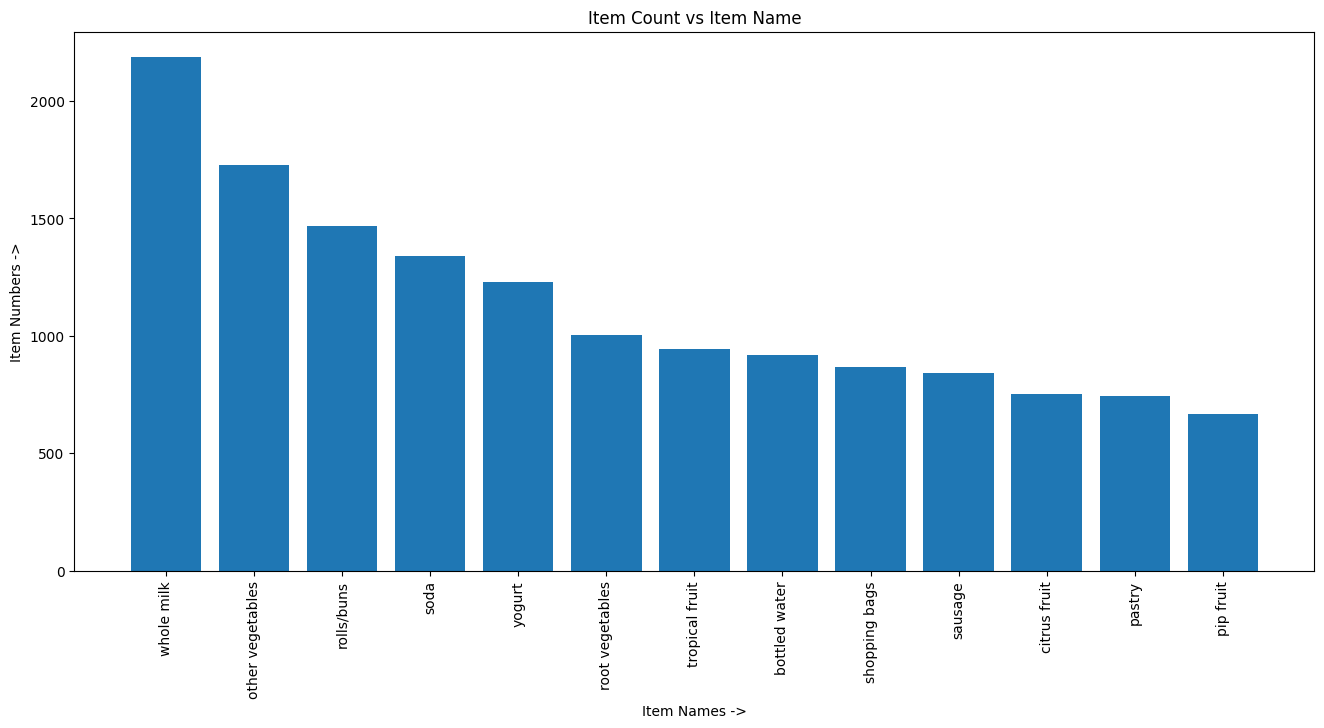

In [17]:
# Step 5: Visualizing "Item Count" Vs "Item Name"
plt.figure(figsize=[16,7])
plt.bar(output_df["item_name"], output_df["item_count"])
plt.ylabel("Item Numbers ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation=90)
plt.title("Item Count vs Item Name")
plt.show()

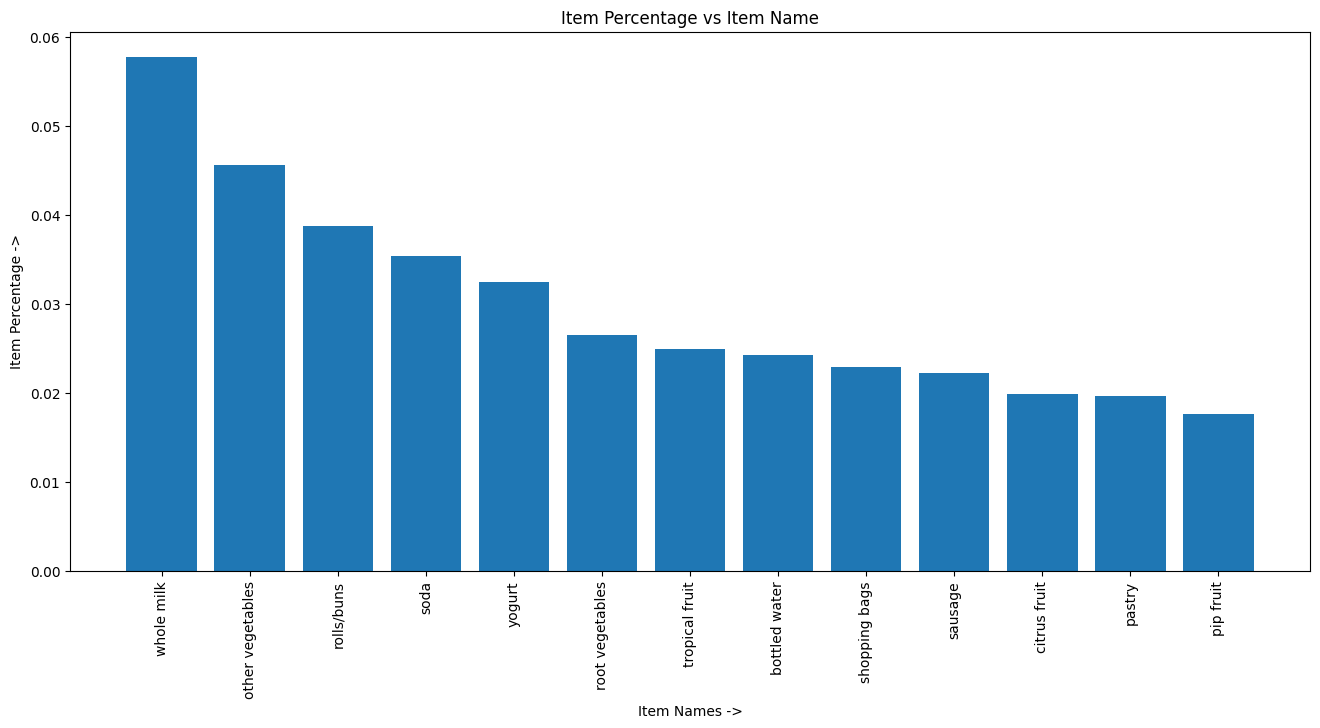

In [18]:
# Step 6: Visualizing "Item Percentage" VS "Item Name"
plt.figure(figsize=[16,7])
plt.bar(output_df["item_name"], output_df["item_perc"])
plt.ylabel("Item Percentage ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation=90)
plt.title("Item Percentage vs Item Name")
plt.show()

In [19]:
# Step 7: Convert dataset to list of lists for Apriori
records = []
row = final_item_df.shape[0]
col = final_item_df.shape[1]

for i in range(0, row):
    records.append([str(final_item_df.values[i, j]) for j in range(0, col)])

In [20]:
# Step 8: Generate Association Rules using Apriori
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [21]:
# Step 9: Format the association rules
results = []

for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    
    if len(items) < 2:
        continue
    
    consequent = str(items[0])
    antecedent = str(items[1])
    support = str(int(float(str(item[1])[:7]) * 100000))
    confidence = str(item[2][0][2])[:7]
    lift = str(item[2][0][3])[:7]
    
    rows = (consequent, antecedent, support, confidence, lift)
    results.append(rows)

final_result = pd.DataFrame(results, columns=['Consequent', 'Antecedent', 'Support', 'Confidence', 'Lift'])


In [22]:
# Step 10: Display final association rules
final_result = final_result.sort_values("Support", ascending=False, ignore_index=True)
final_result = final_result[(final_result["Consequent"] != 'nan') & (final_result["Antecedent"] != 'nan')]

display(final_result)


,Consequent,Antecedent,Support,Confidence,Lift
0,whole milk,tropical fruit,911,0.21825,3.23466
3,ham,white bread,827,0.20576,3.18244
5,root vegetables,tropical fruit,795,0.23300,3.33060
7,flour,sugar,779,0.28143,5.45861
9,red/blush wine,bottled beer,762,0.29113,3.08638
11,root vegetables,tropical fruit,712,0.24855,4.32070
13,whole milk,tropical fruit,696,0.31111,3.46240
15,whole milk,berries,696,0.36521,3.45838
16,white bread,processed cheese,679,0.26282,4.06495
17,whole milk,herbs,679,0.27891,3.52703


In [23]:

# Step 11: Print formatted Association Rules
for i in range(final_result.shape[0]):
    print(f"Seems like people who are buying {final_result.Antecedent[i:i+1].values[0]} are more likely to buy {final_result.Consequent[i:i+1].values[0]}.")

Seems like people who are buying tropical fruit are more likely to buy whole milk.
Seems like people who are buying white bread are more likely to buy ham.
Seems like people who are buying tropical fruit are more likely to buy root vegetables.
Seems like people who are buying sugar are more likely to buy flour.
Seems like people who are buying bottled beer are more likely to buy red/blush wine.
Seems like people who are buying tropical fruit are more likely to buy root vegetables.
Seems like people who are buying tropical fruit are more likely to buy whole milk.
Seems like people who are buying berries are more likely to buy whole milk.
Seems like people who are buying processed cheese are more likely to buy white bread.
Seems like people who are buying herbs are more likely to buy whole milk.
Seems like people who are buying herbs are more likely to buy root vegetables.
Seems like people who are buying other vegetables are more likely to buy whole milk.
Seems like people who are buyin